# Programming in Python for Data Science 

# Assignment 6: Functions Fundamentals and Best Practices

You can't learn technical subjects without hands-on practice. The assignments are an important part of the course. To submit this assignment you will need to make sure that you save your Jupyter notebook. 

Below are the links of 2 videos that explain:

1. [How to save your Jupyter notebook](https://youtu.be/0aoLgBoAUSA) and,       
2. [How to answer a question in a Jupyter notebook assignment](https://youtu.be/7j0WKhI3W4s).

### Assignment Learning Goals:

By the end of the module, students are expected to:

- Evaluate the readability, complexity and performance of a function.
- Write docstrings for functions following the NumPy/SciPy format.
- Write comments within a function to improve readability.
- Write and design functions with default arguments.
- Explain the importance of scoping and environments in Python as they relate to functions.
- Formulate test cases to prove a function design specification.
- Use `assert` statements to formulate a test case to prove a function design specification.
- Use test-driven development principles to define a function that accepts parameters, returns values and passes all tests.
- Handle errors gracefully via exception handling.

This assignment covers [Module 6](https://prog-learn.mds.ubc.ca/en/module6) of the online course. You should complete this module before attempting this assignment.

Any place you see `...`, you must fill in the function, variable, or data to complete the code. Substitute the `None` and the `raise NotImplementedError # No Answer - remove if you provide an answer` with your completed code and answers then proceed to run the cell!

Note that some of the questions in this assignment will have hidden tests. This means that no feedback will be given as to the correctness of your solution. It will be left up to you to decide if your answer is sufficiently correct. These questions are worth 2 points.

In [60]:
# Import libraries needed for this lab
import pandas as pd
import random
import test_assignment6 as t
import altair as alt
import string
import inspect
from hashlib import sha1

## 1.  Writing functions

Here we have the `astronauts.csv` data we have used in previous assignments.

In [61]:
data = pd.read_csv('data/astronauts.csv')
display(data.head())

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,James C. Adamson,1984,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
2,Thomas D. Akers,1987,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
3,Buzz Aldrin,1963,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN
4,Andrew M. Allen,1987,12.0,Retired,8/4/1955,"Philadelphia, PA",Male,Villanova University; University of Florida,Mechanical Engineering,Business Administration,Lieutenant Colonel,US Marine Corps (Retired),3,906,0,0.0,"STS-46 (Atlantis), STS-62 (Columbia), STS-75 (...",NaN,NaN


We have some code that randomly samples and selects a given number of rows from each of the specified column's groups. 
In this case it is randomly selecting 3 astronauts from each possible `Status` (`Active`, `Deceased`, `Management`, `Retired`)

In [62]:
data = pd.read_csv('data/astronauts.csv')
df_grouped = data.groupby('Status')

sampled_df = None

for group, rows in df_grouped: 
    group_sampling =  df_grouped.get_group(group).sample(2)
    sampled_df = pd.concat([sampled_df, group_sampling])
    
display(sampled_df)

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
155,Michael S. Hopkins,2009,20.0,Active,12/28/1968,"Lebanon, MO",Male,University of Illinois; Stanford University,Aerospace Engineering,Aerospace Engineering,Colonel,US Air Force,1,3990,2,13.0,ISS-37/38 (Soyuz),NaN,NaN
85,Alvin B. Drew Jr.,2000,18.0,Active,11/5/1962,"Washington, DC",Male,US Air Force Academy; Embry-Riddle Aeronautica...,Physics & Astronautical Engineering,Aerospace Science; Political Science,Colonel,US Air Force,2,613,2,13.0,"STS-118 (Endeavor), STS-133 (Discovery)",NaN,NaN
253,Patricia Hilliard Robertson,1998,17.0,Deceased,3/12/1963,"Indiana, PA",Female,Indiana University of Pennsylvania; Medical Co...,Biology,Medicine,NaN,NaN,0,0,0,0.0,NaN,5/24/2001,NaN
129,S. David Griggs,1978,8.0,Deceased,9/7/1939,"Portland, OR",Male,US Naval Academy; George Washington University,NaN,Business Administration,NaN,NaN,1,167,1,3.0,STS 51-D (Discovery),6/17/1989,NaN
250,Paul W. Richards,1996,16.0,Management,5/20/1964,"Scranton, PA",Male,Drexel University; University of Maryland,Mechanical Engineering,Mechanical Engineering,NaN,NaN,1,307,1,6.0,STS-102 (Discovery),NaN,NaN
316,Terrence W. Wilcutt,1990,13.0,Management,10/31/1949,"Russellville, KY",Male,Western Kentucky University,Mathematics,NaN,NaN,NaN,4,1008,0,0.0,"STS-68 (Endeavor), STS-79 (Atlantis), STS-89 (...",NaN,NaN
2,Thomas D. Akers,1987,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
237,Niclolas J. M. Patrick,1998,17.0,Retired,3/22/1964,"North Yorkshire, England",Male,University of Cambridge; MIT,Engineering,Engineering; Mechanical Engineering,NaN,NaN,2,638,3,18.0,"STS-116 (Discovery), STS-130 (Endeavor)",NaN,NaN


**Question 1(a)** <br> {points: 3} 

Use the code above to write a function named `sample_dataframe` that randomly samples from any dataframe, N observations from each specified group in a dataframe. 
The function should accept the following arguments:
- The dataframe (`data`)
- The name of the grouping column (`grouping_col`) 

This function should have a default argument of 1 for N.

We have provided you code that executes your function using the `astronauts.csv` dataframe, the grouping column `Group` and a value of 1 for the number of observations to sample. 
The output of this is saved in an object named `astro_grp_samp`.

_**DISCLAIMER:** We understand that one of the limitations of the following dataset is that it reflects binary sex categories._

_Notes:_
- *See this link on[`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) to learn more about how it samples a dataframe*

In [63]:
def sample_dataframe(data, grouping_col, N=1) :
    df_grouped = data.groupby(grouping_col)
    sampled_df = None

    for effective_group, effective_rows in df_grouped: 
        group_sampling =  df_grouped.get_group(effective_group).sample(N)
        sampled_df = pd.concat([sampled_df, group_sampling])

    return sampled_df

astro_grp_samp = sample_dataframe(data, 'Group')
display(astro_grp_samp)

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
75,L. Gordon Cooper Jr.,1959,1.0,Deceased,3/6/1927,"Shawnee, OK",Male,Air Force Institute of Technology,Aeronautical Engineering,NaN,Colonel,US Air Force (Retired),2,225,0,0.0,"Mercury 9, Gemini 5",10/4/2004,NaN
314,Edward H. White II,1962,2.0,Deceased,11/14/1930,"San Antonio, TX",Male,US Military Academy; University of Michigan,NaN,Aeronautical Engineering,Lieutenant Colonel,US Air Force,2,97,1,0.5,"Gemini 4, Apollo 1",1/27/1967,Apollo 1
202,William S. McArthur Jr.,1990,3.0,Management,7/26/1951,"Laurinburg, NC",Male,US Military Academy; Georgia Institute of Tech...,Applied Science & Engineering,Aerospace Engineering,Colonel,US Army (Retired),4,5398,4,24.0,"STS-58 (Columbia), STS-74 (Atlantis), STS-92 (...",NaN,NaN
126,Duane E. Graveline,1965,4.0,Retired,3/2/1931,"Newport, VT",Male,University of Vermont; Johns Hopkins University,NaN,Public Health; Medicine,NaN,NaN,0,0,0,0.0,NaN,NaN,NaN
180,Don L. Lind,1966,5.0,Retired,5/18/1930,"Midvale, UT",Male,University of Utah; University of California-B...,Physics,Nuclear Physics,NaN,NaN,1,168,0,0.0,STS 51-B (Challenger),NaN,NaN
185,John A. Llewellyn,1967,6.0,Retired,4/22/1933,"Cardiff, Wales",Male,University College at Cardiff,Chemistry,Chemistry,NaN,NaN,0,0,0,0.0,NaN,NaN,NaN
79,Robert L. Crippen,1969,7.0,Retired,9/11/1937,"Beaumont, TX",Male,University of Texas,Aerospace Engineering,NaN,Captain,US Navy (Retired),4,565,0,0.0,"STS-1 (Columbia), STS-7 (Challenger), STS 41-C...",NaN,NaN
42,James F. Buchli,1978,8.0,Retired,6/20/1945,"New Rockford, ND",Male,US Naval Academy; University of West Florida,Aeronautical Engineering,Aeronautical Engineering Systems,Colonel,US Marine Corps (Retired),4,490,0,0.0,"STS 51-C (Discovery), STS 61-A (Challenger), S...",NaN,NaN
178,David C. Leestma,1980,9.0,Management,5/6/1949,"Muskegon, MI",Male,US Naval Academy; US Naval Postgraduate School,Aeronautical Engineering,Aeronautical Engineering,Captain,US Navy (Retired),3,532,1,3.0,"STS 41-G (Challenger), STS-28 (Columbia), STS-...",NaN,NaN
56,John H. Casper,1984,10.0,Management,7/9/1943,"Greenville, SC",Male,US Air Force Academy; Purdue University,Engineering Science,Astronautics,Colonel,US Air Force (Retired),4,825,0,0.0,"STS-36 (Atlantis), STS-54 (Endeavor), STS-62 (...",NaN,NaN


In [64]:
t.test_1a(sample_dataframe)

'Success'

**Question 1(b)** <br> {points: 3} 

Write a function named `df_filterer` that filters rows matching an exact value in the column of interest, selects specific columns and returns a dataframe.  

The function should accept the following arguments:
- The dataframe (`data`)
- The name of the column of interest (`interest_column`)
- The value to filter for. (`value`)
- The desired columns to select (input type should be a list) (`keep`) 

Make sure that your function is returning the transformed dataframe. 


In [65]:
def df_filterer(data, interest_column, value, keep) :
    return data[data[interest_column] == value][keep]

In [66]:
princeton_ast = df_filterer(
    data = data,
    interest_column = 'Alma Mater',
    value = 'University of Kansas', 
    keep = ['Name']
)
display(princeton_ast)

,Name
93,Joe H. Engle


In [67]:
t.test_1b(df_filterer,data)

'Success'

## 2.  Writing Docstrings

**Question 2(a)** <br> {points: 1} 

Copy/paste your function from **Question 1(a)**, and then improve it by adding a docstring. 

In [68]:
?pd.DataFrame.sample

Signature:
pd.DataFrame.sample(
    self: 'NDFrameT',
    n: 'int | None' = None,
    frac: 'float | None' = None,
    replace: 'bool_t' = False,
    weights=None,
    random_state: 'RandomState | None' = None,
    axis: 'Axis | None' = None,
    ignore_index: 'bool_t' = False,
) -> 'NDFrameT'
Docstring:
Return a random sample of items from an axis of object.

You can use `random_state` for reproducibility.

Parameters
----------
n : int, optional
    Number of items from axis to return. Cannot be used with `frac`.
    Default = 1 if `frac` = None.
frac : float, optional
    Fraction of axis items to return. Cannot be used with `n`.
replace : bool, default False
    Allow or disallow sampling of the same row more than once.
weights : str or ndarray-like, optional
    Default 'None' results in equal probability weighting.
    If passed a Series, will align with target object on index. Index
    values in weights not found in sampled object will be ignored and
    index values in sampled

In [69]:
def sample_dataframe(data, grouping_col, N=1) :
    '''
    Sample N observations from a DataFrame after it is grouped by a specified column.

    Parameters
    ----------
    data : the dataframe 
    grouping_col : name of the grouping column 
    N : number of observations, optional

    Returns
    -------
    pandas.core.frame.DataFrame
        The sampled dataframe

    Examples
    --------
    >>> sample_dataframe(data, 'Group')

    Name	Year	Group	Status	Birth Date	Birth Place	Gender	Alma Mater	Undergraduate Major	Graduate Major	Military Rank	Military Branch	Space Flights	Space Flight (hr)	Space Walks	Space Walks (hr)	Missions	Death Date	Death Mission
    276	Donald K. Slayton	1959	1.0	Deceased	3/1/1924	Sparta, WI	Male	University of Minnesota	Aeronautical Engineering	NaN	Major	US Air Force Reserves	1	217	0	0.0	Apollo-Soyuz Test Project	6/13/1993	NaN
    31	Frank Borman	1962	2.0	Retired	3/14/1928	Gary, IN	Male	US Military Academy; California Institute of T...	NaN	Aeronautical Engineering	Colonel	US Air Force (Retired)	2	477	0	0.0	Gemini 7, Apollo 8	NaN	NaN
    317	Clifton C. Williams Jr.	1963	3.0	Deceased	9/26/1932	Mobile, AL	Male	Auburn University	Mechanical Engineering	NaN	Major	US Marine Corps	0	0	0	0.0	NaN	10/5/1967	NaN
    215	F. Curtis Michel	1965	4.0	Retired	6/5/1934	LaCrosse, WI	Male	California Institute of Technology	Physics	Physics	NaN	NaN	0	0	0	0.0	NaN	NaN	NaN
    256	Stuart A. Roosa	1966	5.0	Deceased	8/16/1933	Durango, CO	Male	University of Colorado	Aeronautical Engineering	NaN	Colonel	US Air Force (Retired)	1	216	0	0.0	Apollo 14	12/12/1994	NaN
    '''

    df_grouped = data.groupby(grouping_col)
    sampled_df = None

    for effective_group, effective_rows in df_grouped: 
        group_sampling =  df_grouped.get_group(effective_group).sample(N)
        sampled_df = pd.concat([sampled_df, group_sampling])

    return sampled_df

astro_grp_samp = sample_dataframe(data, 'Group')
display(astro_grp_samp)

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
276,Donald K. Slayton,1959,1.0,Deceased,3/1/1924,"Sparta, WI",Male,University of Minnesota,Aeronautical Engineering,NaN,Major,US Air Force Reserves,1,217,0,0.0,Apollo-Soyuz Test Project,6/13/1993,NaN
328,John W. Young,1962,2.0,Retired,9/24/1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,NaN,Captain,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",NaN,NaN
7,William A. Anders,1963,3.0,Retired,10/17/1933,Hong Kong,Male,US Naval Academy; Air Force Institute of Techn...,Nuclear Engineering,Nuclear Engineering,Major General,US Air Force Reserves (Retired),1,147,0,0.0,Apollo 8,NaN,NaN
117,Edward G. Gibson,1965,4.0,Retired,11/8/1936,"Buffalo, NY",Male,University of Rochester; California Institute ...,Engineering,Engineering,NaN,NaN,1,2017,3,15.0,Skylab 4,NaN,NaN
119,Edward G. Givens Jr.,1966,5.0,Deceased,1/5/1930,"Quanah, TX",Male,US Naval Academy,Naval Sciences,NaN,Major,US Air Force,0,0,0,0.0,NaN,6/6/1967,NaN
5,Joseph P. Allen,1967,6.0,Retired,6/27/1937,"Crawsfordsville, IN",Male,DePauw University; Yale University,Mathematics & Physics,Physics,NaN,NaN,2,313,2,12.0,"ST-5 (Columbia), STS 51-A (Discovery)",NaN,NaN
299,Richard H. Truly,1969,7.0,Retired,11/12/1937,"Fayette, MS",Male,Georgia Institute of Technology,Aeronautical Engineering,NaN,Vice Admiral,US Navy (Retired),2,199,0,0.0,"STS-2 (Columbia), STS-8 (Challenger)",NaN,NaN
142,Steven A. Hawley,1978,8.0,Retired,12/12/1951,"Ottawa, KS",Male,University of Kansas; University of California,Physics & Astronomy,Astronomy & Astrophysics,NaN,NaN,5,770,0,0.0,"STS 41-D (Discovery), STS 61-C (Columbia), STS...",NaN,NaN
178,David C. Leestma,1980,9.0,Management,5/6/1949,"Muskegon, MI",Male,US Naval Academy; US Naval Postgraduate School,Aeronautical Engineering,Aeronautical Engineering,Captain,US Navy (Retired),3,532,1,3.0,"STS 41-G (Challenger), STS-28 (Columbia), STS-...",NaN,NaN
55,Manley Lanier Carter Jr.,1984,10.0,Deceased,8/15/1947,"Macon, GA",Male,Emory University,Chemistry,Medicine,Captain,US Navy,1,120,0,0.0,STS-33 (Discovery),4/5/1991,NaN


In [70]:
?sample_dataframe

Signature: sample_dataframe(data, grouping_col, N=1)
Docstring:
Sample N observations from a DataFrame after it is grouped by a specified column.

Parameters
----------
data : the dataframe 
grouping_col : name of the grouping column 
N : number of observations, optional

Returns
-------
the sampled dataframe

Examples
--------
>>> sample_dataframe(data, 'Group')

Name        Year    Group   Status  Birth Date      Birth Place     Gender  Alma Mater      Undergraduate Major     Graduate Major  Military Rank   Military Branch Space Flights   Space Flight (hr)       Space Walks     Space Walks (hr)        Missions        Death Date      Death Mission
276 Donald K. Slayton       1959    1.0     Deceased        3/1/1924        Sparta, WI      Male    University of Minnesota Aeronautical Engineering        NaN     Major   US Air Force Reserves   1       217     0       0.0     Apollo-Soyuz Test Project       6/13/1993       NaN
31  Frank Borman    1962    2.0     Retired 3/14/1928       Gar

In [71]:
t.test_2a(sample_dataframe)

'Success'

**Question 2(b)** <br> {points: 2} 

Copy/paste your function from **Question 1(b)**, and then improve it by adding a docstring. 

In [72]:
def df_filterer(data, interest_column, value, keep) :
    '''
    Filters rows matching an exact value in a dataframe column of interest.

    Parameters
    ----------
    data : the dataframe 
    interest_col : name of the column of interest
    value : value to filter for
    keep : list of columns to keep from dataframe

    Returns
    -------
    pandas.core.frame.DataFrame
        Transformed dataframe with the selected columns from the filtered dataframe 

    Examples
    --------
    >>> df_filterer(data, 'Alma Mater', 'University of Kansas', ['Name'])
	Name
    93	Joe H. Engle
    '''

    return data[data[interest_column] == value][keep]

In [73]:
# check that the function exists
assert 'df_filterer' in globals(
), "Please make sure that your solution is named 'df_filterer'"

# This test has been intentionally hidden. It will be up to you to decide if your solution
# is sufficiently good.

## 3. Function with Exceptions 

**Question 3(a)** <br> {points: 1} 

Copy/paste your function from **Question 1(b)**, and add exceptions to check that:

1. A dataframe is the type of object being passed into the `data` argument (*Hint: you may want to use [this function](https://python-reference.readthedocs.io/en/latest/docs/functions/isinstance.html)*)
1. `value` exists in the dataframe (`.tolist()` may come in handy here) 
1. `interest_column` exists in the dataframe
1. The elements in `keep` exist in the dataframe

In [74]:
def df_filterer(data, interest_column, value, keep) :
    '''
    Filters rows matching an exact value in a dataframe column of interest.

    Parameters
    ----------
    data : the dataframe 
    interest_column : name of the column of interest
    value : value to filter for
    keep : list of columns to keep from dataframe

    Returns
    -------
    pandas.core.frame.DataFrame
        Transformed dataframe with the selected columns from the filtered dataframe 

    Examples
    --------
    >>> df_filterer(data, 'Alma Mater', 'University of Kansas', ['Name'])
	Name
    93	Joe H. Engle
    '''

    if not isinstance(data, pd.DataFrame) :
        raise TypeError("You are not using a DataFrame for the data input.")
    if not isinstance(interest_column, str) :
        raise TypeError("You are not using a string for the interest_column input.")
    if value not in data[interest_column].to_list() :
        raise ValueError(f"value is not in the {interest_column} column.")
    if not isinstance(keep, list) :
        raise Exception(f"You are not using a list for the keep input.")

    return data[data[interest_column] == value][keep]

In [75]:
t.test_3a(df_filterer)

'Success'

**Question 3(b)** <br> {points: 1} 

Copy/paste your function from **Question 1(a)**, and add at least 3 useful exceptions of your choice.

In [76]:
def sample_dataframe(data, grouping_col, N=1) :
    '''
    Sample N observations from a DataFrame after it is grouped by a specified column.

    Parameters
    ----------
    data : the dataframe 
    grouping_col : name of the grouping column 
    N : number of observations, optional

    Returns
    -------
    pandas.core.frame.DataFrame
        the sampled dataframe

    Examples
    --------
    >>> sample_dataframe(data, 'Group')

    Name	Year	Group	Status	Birth Date	Birth Place	Gender	Alma Mater	Undergraduate Major	Graduate Major	Military Rank	Military Branch	Space Flights	Space Flight (hr)	Space Walks	Space Walks (hr)	Missions	Death Date	Death Mission
    276	Donald K. Slayton	1959	1.0	Deceased	3/1/1924	Sparta, WI	Male	University of Minnesota	Aeronautical Engineering	NaN	Major	US Air Force Reserves	1	217	0	0.0	Apollo-Soyuz Test Project	6/13/1993	NaN
    31	Frank Borman	1962	2.0	Retired	3/14/1928	Gary, IN	Male	US Military Academy; California Institute of T...	NaN	Aeronautical Engineering	Colonel	US Air Force (Retired)	2	477	0	0.0	Gemini 7, Apollo 8	NaN	NaN
    317	Clifton C. Williams Jr.	1963	3.0	Deceased	9/26/1932	Mobile, AL	Male	Auburn University	Mechanical Engineering	NaN	Major	US Marine Corps	0	0	0	0.0	NaN	10/5/1967	NaN
    215	F. Curtis Michel	1965	4.0	Retired	6/5/1934	LaCrosse, WI	Male	California Institute of Technology	Physics	Physics	NaN	NaN	0	0	0	0.0	NaN	NaN	NaN
    256	Stuart A. Roosa	1966	5.0	Deceased	8/16/1933	Durango, CO	Male	University of Colorado	Aeronautical Engineering	NaN	Colonel	US Air Force (Retired)	1	216	0	0.0	Apollo 14	12/12/1994	NaN
    '''

    # Exceptions
    if not isinstance(data, pd.DataFrame) :
        raise TypeError("You are not using a DataFrame for the data input.")
    if not isinstance(grouping_col, str) :
        raise TypeError("You are not using a string for the grouping_col input.")
    if not isinstance(N, int) :
        raise Exception(f"You are not using an integer for the N input.")

    df_grouped = data.groupby(grouping_col)
    sampled_df = None

    for effective_group, effective_rows in df_grouped: 
        group_sampling =  df_grouped.get_group(effective_group).sample(N)
        sampled_df = pd.concat([sampled_df, group_sampling])

    return sampled_df

astro_grp_samp = sample_dataframe(data, 'Group')
display(astro_grp_samp)

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
75,L. Gordon Cooper Jr.,1959,1.0,Deceased,3/6/1927,"Shawnee, OK",Male,Air Force Institute of Technology,Aeronautical Engineering,NaN,Colonel,US Air Force (Retired),2,225,0,0.0,"Mercury 9, Gemini 5",10/4/2004,NaN
74,Charles Conrad Jr.,1962,2.0,Deceased,5/2/1930,"Philadelphia, PA",Male,Princeton University,Aeronautical Engineering,NaN,Captain,US Navy (Retired),4,1179,4,12.0,"Gemini 5, Gemini 11, Apollo 12, Skylab 2",7/8/1999,NaN
108,Theodore C. Freeman,1963,3.0,Deceased,2/18/1930,"Haversford, PA",Male,US Naval Academy; University of Michigan,NaN,Aeronautical Engineering,Captain,US Air Force,0,0,0,0.0,NaN,10/31/1964,NaN
126,Duane E. Graveline,1965,4.0,Retired,3/2/1931,"Newport, VT",Male,University of Vermont; Johns Hopkins University,NaN,Public Health; Medicine,NaN,NaN,0,0,0,0.0,NaN,NaN,NaN
216,Edgar D. Mitchell,1966,5.0,Retired,9/17/1930,"Hereford, TX",Male,Carnegie-Mellon University; US Naval Postgradu...,Industrial Management,Aeronautical Engineering; Aeronautics & Astron...,Captain,US Navy (Retired),1,216,2,9.0,Apollo 14,NaN,NaN
228,Brian T. O'Leary,1967,6.0,Deceased,1/27/1940,"Boston, MA",Male,Williams College; Georgetown University; Unive...,Physics,Astronomy,NaN,NaN,0,0,0,0.0,NaN,7/28/2011,NaN
79,Robert L. Crippen,1969,7.0,Retired,9/11/1937,"Beaumont, TX",Male,University of Texas,Aerospace Engineering,NaN,Captain,US Navy (Retired),4,565,0,0.0,"STS-1 (Columbia), STS-7 (Challenger), STS 41-C...",NaN,NaN
268,Margaret Rhea Seddon,1978,8.0,Retired,11/8/1947,"Murfreesboro, TN",Female,University of California-Berkeley; University ...,Physiology,Medicine,NaN,NaN,3,722,0,0.0,"STS 51-D (Discovery), STS-40 (Columbia), STS-5...",NaN,NaN
17,James P. Bagian,1980,9.0,Retired,2/22/1952,"Philadelphia, PA",Male,Drexel University; Thomas Jefferson University,Mechanical Engineering,Medicine,NaN,NaN,2,337,0,0.0,"STS-29 (Discovery), STS-40 (Columbia)",NaN,NaN
55,Manley Lanier Carter Jr.,1984,10.0,Deceased,8/15/1947,"Macon, GA",Male,Emory University,Chemistry,Medicine,Captain,US Navy,1,120,0,0.0,STS-33 (Discovery),4/5/1991,NaN


In [77]:
t.test_3b(sample_dataframe)

'Success'

## 4. Helper Data and Unit Tests

**Question 4(a)** <br> {points: 1} 

Write helper data for the function in **Question 1(a)** that will be useful to write unit tests. 
Name the dataframe `helper_data`.

Make sure your data has 5-20 rows and 3-10 columns.   

*(Remember you are expected to group and sample from this function.)* 



In [78]:
helper_data = {
    'A' : [1, 3, 20, 11, 2222],
    'B' : [1, 1, 1, 222, 222],
    'C' : [1, 5, 22, 33, 22],
    'D' : [1, 1, 2, 2, 3],
    'E' : ['1', '2', '3', '4', '5'],
    'F' : ['11', '11', '22', '44', '55'],
}

helper_data = pd.DataFrame(helper_data)
display(helper_data)

,A,B,C,D,E,F
0,1,1,1,1,1,11
1,3,1,5,1,2,11
2,20,1,22,2,3,22
3,11,222,33,2,4,44
4,2222,222,22,3,5,55


In [79]:
helper_data_dtypes = {col : type for col, type in zip(list(helper_data.columns), list(helper_data.dtypes))}
display(helper_data_dtypes)

{'A': dtype('int64'),
 'B': dtype('int64'),
 'C': dtype('int64'),
 'D': dtype('int64'),
 'E': dtype('O'),
 'F': dtype('O')}

In [80]:
t.test_4a(helper_data)

'Success'

**Question 4(b)** <br> {points: 2} 

Create a function named `test_sample_dataframe` which takes zero arguments. The function should contain the code to make the helper data from **Question 4(a)**. Also in this function, write 5 `assert` tests that checks your function from **Question 1(a)** using the helper data that you made in **Question 4(a)**.

After writing your function, make sure to call it and see if your function outputs any assert messages.

Make sure to include a `return` statement in your function. Your function should not return any values.

In [81]:
def sample_dataframe(data, grouping_col, N=1) :
    '''
    Sample N observations from a DataFrame after it is grouped by a specified column.

    Parameters
    ----------
    data : the dataframe 
    grouping_col : name of the grouping column 
    N : number of observations, optional

    Returns
    -------
    pandas.core.frame.DataFrame
        The sampled dataframe

    Examples
    --------
    >>> sample_dataframe(data, 'Group')

    Name	Year	Group	Status	Birth Date	Birth Place	Gender	Alma Mater	Undergraduate Major	Graduate Major	Military Rank	Military Branch	Space Flights	Space Flight (hr)	Space Walks	Space Walks (hr)	Missions	Death Date	Death Mission
    276	Donald K. Slayton	1959	1.0	Deceased	3/1/1924	Sparta, WI	Male	University of Minnesota	Aeronautical Engineering	NaN	Major	US Air Force Reserves	1	217	0	0.0	Apollo-Soyuz Test Project	6/13/1993	NaN
    31	Frank Borman	1962	2.0	Retired	3/14/1928	Gary, IN	Male	US Military Academy; California Institute of T...	NaN	Aeronautical Engineering	Colonel	US Air Force (Retired)	2	477	0	0.0	Gemini 7, Apollo 8	NaN	NaN
    317	Clifton C. Williams Jr.	1963	3.0	Deceased	9/26/1932	Mobile, AL	Male	Auburn University	Mechanical Engineering	NaN	Major	US Marine Corps	0	0	0	0.0	NaN	10/5/1967	NaN
    215	F. Curtis Michel	1965	4.0	Retired	6/5/1934	LaCrosse, WI	Male	California Institute of Technology	Physics	Physics	NaN	NaN	0	0	0	0.0	NaN	NaN	NaN
    256	Stuart A. Roosa	1966	5.0	Deceased	8/16/1933	Durango, CO	Male	University of Colorado	Aeronautical Engineering	NaN	Colonel	US Air Force (Retired)	1	216	0	0.0	Apollo 14	12/12/1994	NaN
    '''

    # Exceptions
    if not isinstance(data, pd.DataFrame) :
        raise TypeError("You are not using a DataFrame for the data input.")
    if not isinstance(grouping_col, str) :
        raise TypeError("You are not using a string for the grouping_col input.")
    if not isinstance(N, int) :
        raise Exception(f"You are not using an integer for the N input.")

    df_grouped = data.groupby(grouping_col)
    sampled_df = None

    for effective_group, effective_rows in df_grouped: 
        # Try to sample N observations.
        if len(df_grouped.get_group(effective_group).index) >= N :
            group_sampling =  df_grouped.get_group(effective_group).sample(N)
        # Sample the maximum number of possible observations.
        else :
            group_sampling =  df_grouped.get_group(effective_group).sample(len(df_grouped.get_group(effective_group).index))
        
        sampled_df = pd.concat([sampled_df, group_sampling])

    return sampled_df

astro_grp_samp = sample_dataframe(data, 'Group')
display(astro_grp_samp)

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
53,M. Scott Carpenter,1959,1.0,Retired,5/1/1925,"Boulder, CO",Male,University of Colorado,Aeronautical Engineering,NaN,Commander,US Navy (Retired),1,4,0,0.0,Mercury 7,NaN,NaN
328,John W. Young,1962,2.0,Retired,9/24/1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,NaN,Captain,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",NaN,NaN
81,Walter Cunningham,1963,3.0,Retired,3/16/1932,"Creston, IA",Male,University of California-Los Angeles,Physics,Physics,Colonel,US Marine Corps Reserves,1,260,0,0.0,Apollo 7,NaN,NaN
114,Owen K. Garriott,1965,4.0,Retired,11/22/1930,"Enid, OK",Male,University of Oklahoma; Stanford University,Electrical Engineering,Electrical Engineering,NaN,NaN,2,1674,3,14.0,"Skylab 3, STS-9 (Columbia)",NaN,NaN
87,Charles M. Duke Jr.,1966,5.0,Retired,10/3/1935,"Charlotte, NC",Male,US Naval Academy; MIT,Naval Sciences,Aeronautics,Brigadier General,US Air Force (Retired),1,265,3,20.0,Apollo 16,NaN,NaN
220,Story Musgrave,1967,6.0,Retired,8/19/1935,"Boston, MA",Male,Syracuse University; Marietta College; Univers...,Mathematics & Statistics; Chemistry,Business Administration; Physiology; Literatur...,NaN,NaN,6,1281,4,26.0,"STS-6 (Challenger), STS 51-F (Challenger), STS...",NaN,NaN
299,Richard H. Truly,1969,7.0,Retired,11/12/1937,"Fayette, MS",Male,Georgia Institute of Technology,Aeronautical Engineering,NaN,Vice Admiral,US Navy (Retired),2,199,0,0.0,"STS-2 (Columbia), STS-8 (Challenger)",NaN,NaN
139,Terry J. Hart,1978,8.0,Retired,10/27/1946,"Pittsburgh, PA",Male,Lehigh University; MIT; Rutgers University,Mechanical Engineering,Mechanical Engineering; Electrical Engineering,NaN,NaN,1,167,0,0.0,STS 41-C (Challenger),NaN,NaN
102,William F. Fisher,1980,9.0,Retired,4/1/1946,"Dallas, TX",Male,Stanford University; University of Houston; Un...,NaN,Engineering; Medicine,NaN,NaN,1,170,2,12.0,STS 51-I (Discovery),NaN,NaN
41,Mark N. Brown,1984,10.0,Retired,11/18/1951,"Valparaiso, IN",Male,Purdue University; Air Force Institute of Tech...,Aeronautical & Astronautical Engineering,Astronautical Engineering,Colonel,US Air Force (Retired),2,249,0,0.0,"STS 28 (Columbia), STS-48 (Discovery)",NaN,NaN


In [82]:
def test_sample_dataframe() :
    helper_data = {}
    helper_data['A'] = [1, 3, 20, 11, 2222]
    helper_data['B'] = [1, 1, 1, 222, 222]
    helper_data['C'] = [1, 5, 22, 33, 22]
    helper_data['D'] = [1, 1, 2, 2, 3]
    helper_data['E'] = ['1', '2', '3', '4', '5']
    helper_data['F'] = ['11', '11', '22', '44', '55']

    helper_data = pd.DataFrame(helper_data)

    # Test Without Optional N Value.
    assert sorted(sample_dataframe(helper_data, 'D')['D'].to_list()) == [1, 2, 3], f"Function Grouped Col : {sorted(sample_dataframe(helper_data, 'D')['D'].to_list())}"
    assert len(sample_dataframe(helper_data, 'E')) == 5, f"DataFrame Length : {sample_dataframe(helper_data, 'E')}"

    # Test With N > 1 (All Groups Have >= N Samples).
    assert sorted(sample_dataframe(helper_data, 'B', N = 2)['B'].to_list()) == [1, 1, 222, 222], f"Function Grouped Col : {sorted(sample_dataframe(helper_data, 'B', N = 2)['B'].to_list())}"
    assert len(sample_dataframe(helper_data, 'B', N = 2)) == 4, f"DataFrame Length : {len(sample_dataframe(helper_data, 'B', N = 2))}"

    # Test With N > 1 (Some Groups Have >= N Samples).
    assert sorted(sample_dataframe(helper_data, 'D', N = 2)['D'].to_list()) == [1, 1, 2, 2, 3], f"Function Grouped Col : {sorted(sample_dataframe(helper_data, 'D', N = 2)['D'].to_list()) == [1, 1, 2, 2, 3]}"    

    ## Comment Out In Case Assignment Test Fails with 6 Asserts.
    # Test With N = 0.
    # assert len(sample_dataframe(helper_data, 'B', N = 0)) == 0, f"DataFrame Length : {len(sample_dataframe(helper_data, 'B', N = 0))}"

    return 

In [83]:
sorted(sample_dataframe(helper_data, 'D', N = 2)['D'].to_list())

[1, 1, 2, 2, 3]

In [84]:
test_sample_dataframe()

In [85]:
# check that the function exists
assert 'test_sample_dataframe' in globals(
), "Please make sure that your solution is named 'test_sample_dataframe'"

# This test has been intentionally hidden. It will be up to you to decide if your solution
# is sufficiently good.

## 5. Function Design

**Question  5(a)** <br> {points: 1} 

Below we have a function that takes zero arguments and returns the astronaut dataframe filtered to only include astronauts who have had over 6000 hours of space flight.

_**DISCLAIMER:** We understand that one of the limitations of the following dataset is that it reflects binary sex categories._

In [86]:
def load_astronauts(): 
    """
    Reads in the astronaut data and filters it for space flight time
    greater than 6000
    
    Returns
    -------
    pandas.core.frame.DataFrame
        The filtered astronaut dataframe 
    
    Examples
    --------
    >>> load_astronauts()
    """
    
    df = pd.read_csv('data/astronauts.csv')
    df = df[df['Space Flight (hr)'] >= 6000]
    return df

In [87]:
space = load_astronauts()
display(space)

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
99,E. Michael Fincke,1996,16.0,Active,3/14/1967,"Pittsburgh, PA",Male,MIT; Stanford University; University of Housto...,"Aeronautics & Astronautics; Earth, Atmospheric...",Aeronautics & Astronautics; Physical Sciences,Colonel,US Air Force,3,9159,9,48.0,"ISS-09 (Soyuz), ISS-18 (Soyuz), STS-134 (Endea...",NaN,NaN
103,C. Michael Foale,1987,12.0,Active,1/6/1957,"Louth, England",Male,Cambridge University,Physics,Laboratory Astrophysics,NaN,NaN,6,8970,4,22.0,"STS-45 (Atlantis), STS-56 (Discovery), STS-63 ...",NaN,NaN
170,Scott J. Kelly,1996,16.0,Active,2/21/1964,"Orange, NJ",Male,State University of New York Maritime College;...,Electrical Engineering,Aviation Systems,Captain,US Navy (Retired),4,12490,3,18.0,"STS-103 (Discovery), STS-118 (Endeavor), ISS-2...",NaN,NaN
187,Michael E. Lopez-Alegria,1992,14.0,Retired,5/30/1958,"Madrid, Spain",Male,US Naval Academy; US Naval Postgraduate School,Systems Engineering,Aeronautical Engineering,Captain,US Navy (Retired),3,6190,10,67.0,"STS-73 (Columbia), STS-92 (Discovery), STS-113...",NaN,NaN
239,Donald R. Pettit,1996,16.0,Active,4/20/1955,"Silverton, OR",Male,Oregon State University; University of Arizona,Chemical Engineering,Chemical Engineering,NaN,NaN,3,8872,2,13.0,"ISS-6 (Soyuz), STS-126 (Endeavor), ISS-30/31 (...",NaN,NaN
315,Peggy A. Whitson,1996,16.0,Active,2/9/1960,"Mt. Ayr, IA",Female,Iowa Wesleyan College; Rice University,Chemistry & Biology,Biochemistry,NaN,NaN,3,11698,7,46.0,"STS-111/113 (Endeavor), ISS-16 (Soyuz), ISS-50...",NaN,NaN
319,Jeffrey N. Williams,1996,16.0,Active,1/18/1958,"Superior, WI",Male,US Military Academy; US Naval Postgraduate Sch...,Applied Science & Engineering,Aeronautical Engineering; National Security & ...,Colonel,US Army (Retired),4,12818,5,32.0,"STS-101 (Atlantis), ISS-13 (Soyuz), ISS-21/22 ...",NaN,NaN
320,Sunita L. Williams,1998,17.0,Active,9/19/1965,"Euclid, OH",Female,US Naval Academy; Florida Institute of Technology,Physical Science,Engineering Management,Captain,US Navy,2,7721,7,50.0,"STS-116/117 (Discovery/Atlantis), ISS-32/33 (S...",NaN,NaN


What is wrong with the function `load_astronauts()`?


A) It doesn't take any arguments which is not good function design. 

B) It's attempting to do too many things by reading in the data AND filtering on `Space Flight (hr)`

C) It contains side effects that could easily be removed. 

D) It limits the user to only use the function to obtain astronauts with a hard-coded amount of `'Space Flight (hr)'` time. 




*Answer in the cell below using the uppercase letter associated with your answer. Place your answer between "", assign the correct answer to an object called `answer5_a`.*

In [88]:
answer5_a = 'D'

In [89]:
t.test_5a(answer5_a)

'Success'

**Question  5(b)** <br> {points: 2} 

Given the function above, write a new similar function named `astronauts_space_time` that takes in an argument and corrects for the issue you identified above. 

Remember to add a `docstring` in your function.

In [90]:
def astronauts_space_time(filter_time): 
    """
    Reads in the astronaut data and filters it for space flight time
    greater than a specified amount
    
    Parameters
    ---------
    filter_time : int
        the minimum space flight time 

    Returns
    -------
    pandas.core.frame.DataFrame
        The filtered astronaut dataframe 
    
    Examples
    --------
    >>> astronauts_space_time(6000)
    """
    
    df = pd.read_csv('data/astronauts.csv')
    df = df[df['Space Flight (hr)'] >= filter_time]
    return df

In [91]:
# check that the function exists
assert 'astronauts_space_time' in globals(
), "Please make sure that your solution is named 'astronauts_space_time'"

# This test has been intentionally hidden. It will be up to you to decide if your solution
# is sufficiently good.

**Question  5(c)** <br> {points: 1} 

The function `astronaut_full_service` reads in the astronaut dataframe and prints multiple calculations and returns a plot. 

In [92]:
def astronaut_full_service(status=None): 
    """
    Reads in the astronaut data, and potentially filters the data based on status.
    It prints out the mean space flight time and then plots it as a histogram with 
    both genders and plots both genders seperately. 

    
    Parameters
    ----------
    status : str, optional
        The status of an astronaut; Active, Deceased, Retired, etc (the default is None which implies 
        that no filtering is occuring) 
    
    Returns
    -------
    altair.vegalite.v4.api.FacetChart
        A histogram faceted for gender of the Space flight time. 
    
    Examples
    --------
    >>> astronaut_full_service('Retired')
    Alt.Chart(...)
    """
    
    df = pd.read_csv('data/astronauts.csv')
    
    if status is not None: 
        df = df[df['Status'] == status]

    mean_flight =  df['Space Flight (hr)'].mean()
    
    print('Mean Space Walk Time:', mean_flight) 
    
    plot1 = alt.Chart(df).mark_bar(size=40, color = 'tomato').encode(
            alt.X('Space Flights:Q'),
            alt.Y('count()'))
    
    plot1.display()
    
    plot2 = alt.Chart(df).mark_bar(size=40).encode(
            alt.X('Space Flights:Q'),
            alt.Y('count()'),
            color=alt.Color('Gender',
                   scale=alt.Scale(
            domain=['Male', 'Female'],
            range=['Navy', 'tomato']))
    ).facet(alt.Column('Gender:N'))
 
    return plot2

In [93]:
astronaut_full_service('Deceased')

Mean Space Walk Time: 274.1875


alt.Chart(...)

alt.FacetChart(...)

What is the primary issue with function `astronaut_full_service()`?


A) The arguments it accepts are too limited. Having more options for arguments will give the ability to produce plots with more versatility and better insights 

B) There is no way of obtaining the results of `mean_flight`  from this function. The user would need to write additional code to obtain it. 

C) It contains side effects that could easily be removed. 

D) The plots are calling in variables from the global environment. 



*Answer in the cell below using the uppercase letter associated with your answer. Place your answer between "", assign the correct answer to an object called `answer5_c`.*

In [94]:
answer5_c = 'B'

In [95]:
t.test_5c(answer5_c)

'Success'

**Question  5(d)** <br> {points: 1} 

Given the function `astronaut_full_service`  write a new function similar function named `astronauts_stats` that  corrects for the issue you identified above. 

Your function should return a single value. 

Make sure to include a `docstring` for you function.

Test it out with `status='Deceased'`. 

In [96]:
def astronauts_stats(status=None): 
    """
    Reads in the astronaut data, and potentially filters the data based on status.
    It prints out the mean space flight time and then plots it as a histogram with 
    both genders and plots both genders seperately. 

    
    Parameters
    ----------
    status : str, optional
        The status of an astronaut; Active, Deceased, Retired, etc (the default is None which implies 
        that no filtering is occuring) 
    
    Returns
    -------
    float
        Mean space flight time
    altair.vegalite.v4.api.FacetChart
        A histogram faceted for gender of the Space flight time. 
    
    Examples
    --------
    >>> astronaut_stats('Retired')
    Mean Space Walk Time: 274.1875
    Alt.Chart(...)
    """
    
    df = pd.read_csv('data/astronauts.csv')
    
    if status is not None: 
        df = df[df['Status'] == status]

    mean_flight =  df['Space Flight (hr)'].mean()
    
    print('Mean Space Walk Time:', mean_flight) 
    
    plot1 = alt.Chart(df).mark_bar(size=40, color = 'tomato').encode(
            alt.X('Space Flights:Q'),
            alt.Y('count()'))
    
    plot1.display()
    
    plot2 = alt.Chart(df).mark_bar(size=40).encode(
            alt.X('Space Flights:Q'),
            alt.Y('count()'),
            color=alt.Color('Gender',
                   scale=alt.Scale(
            domain=['Male', 'Female'],
            range=['Navy', 'tomato']))
    ).facet(alt.Column('Gender:N'))
 
    plot2.display()

    return mean_flight 

In [97]:
astronauts_stats(status='Deceased')

Mean Space Walk Time: 274.1875


alt.Chart(...)

alt.FacetChart(...)

274.1875

In [98]:
t.test_5d(astronauts_stats)

Mean Space Walk Time: 274.1875


alt.Chart(...)

alt.FacetChart(...)

'Success'

**Question  5(e)** <br> {points: 1} 

We have a final function named `filter_astronauts` that uses the astronaut dataset as an argument. It takes multiple arguments and returns a dictionary with 2 dataframes as values


In [99]:
astronauts = pd.read_csv('data/astronauts.csv')

def filter_astronauts(df, military_rank, year_min, year_max): 
    """
    Filters the input argument data based on military rank and the astronauts entry year.

    
    Parameters
    ----------
    df : pandas.core.frame.DataFrame
        The dataframe to filter
    military_rank : str
        The astronaut's military rank if any. If "No Rank", filters for no military ranking. 
    year_min : int
        Astronaut entry year minimum 
    year_max : int
        Astronaut entry year minimum 
    
    Returns
    -------
    dict
        A dictionary containing the 2 dataframes  
    
    Examples
    --------
    >>> filter_astronauts(df, "No Rank", 1996, 2010)

    """
   
    if military_rank == "No Rank": 
        df_military = df[df['Military Rank'].isnull()]
    elif military_rank is None: 
        df_military = df
    else:
        df_military = df[df['Military Rank'] == military_rank]
    
    df_year = df[(df['Year'] >= year_min) & (df['Year'] <= year_max)]
    
    dataframe_dict = {'military_filtered': df_military, 'year_filtered': df_military}
   
    return dataframe_dict

In [100]:
filter_astronauts(astronauts, "No Rank", 1996, 2010 )

{'military_filtered':                     Name  Year  Group      Status  Birth Date  \
 0        Joseph M. Acaba  2004   19.0      Active   5/17/1967   
 5        Joseph P. Allen  1967    6.0     Retired   6/27/1937   
 8    Clayton C. Anderson  1998   17.0     Retired   2/23/1959   
 11       Jerome Apt III   1985   11.0     Retired   4/18/1949   
 13     Neil A. Armstrong  1962    2.0    Deceased    8/5/1930   
 ..                   ...   ...    ...         ...         ...   
 315     Peggy A. Whitson  1996   16.0      Active    2/9/1960   
 316  Terrence W. Wilcutt  1990   13.0  Management  10/31/1949   
 322  Stephanie D. Wilson  1996   16.0      Active   9/27/1966   
 324   Peter J. K. Wisoff  1990   13.0     Retired   8/16/1958   
 325        David A. Wolf  1990   13.0     Retired   8/23/1956   
 
              Birth Place  Gender  \
 0          Inglewood, CA    Male   
 5    Crawsfordsville, IN    Male   
 8              Omaha, NE    Male   
 11       Springfield, MA    Male   


Why is the function `filter_astronauts()` not considered the best possible design ?

A) It returns a dictionary which is not good function design. 

B) It's attempting to do too many things and it would be better to have 2 separate functions, one that returns each dataframe. 

C) It contains side effects that could easily be removed. 

D) It limits the user's ability to filter on specific columns. 


*Answer in the cell below using the uppercase letter associated with your answer. Place your answer between "", assign the correct answer to an object called `answer5_e`.*

In [101]:
answer5_e = 'B'

In [102]:
t.test_5e(answer5_e)

'Success'

**Question  5(f)** <br> {points: 1} 

Given the function above, solve the issue that you specified above by making 2 new functions named `filters_military_rank` and `filters_active_years`. 
Your new functions should have applicable arguments from the function in question `5e`.

Make sure to include a `docstring` for your function.

Run your new functions using the same parameters as: 

`filter_astronauts(astronauts, "No Rank", 1996, 2010)`

Save your answers in objects named `astro_no_rank` and `astro_96_10`.

The returned items should be `dataframes`.

In [103]:
astronauts = pd.read_csv('data/astronauts.csv')

In [104]:
def filters_military_rank(df, military_rank): 
    """
    Filters the input argument data based on military rank.

    
    Parameters
    ----------
    df : pandas.core.frame.DataFrame
        The dataframe to filter
    military_rank : str
        The astronaut's military rank if any. If "No Rank", filters for no military ranking. 
    
    Returns
    -------
    df_military
        A dataframe of astronauts with the filtered military rank.
    
    Examples
    --------
    >>> filters_military_rank(astronauts, "No Rank")

    """
   
    if military_rank == "No Rank": 
        df_military = df[df['Military Rank'].isnull()]
    elif military_rank is None: 
        df_military = df
    else:
        df_military = df[df['Military Rank'] == military_rank]
   
    return df_military

In [105]:
astro_no_rank = filters_military_rank(astronauts, "No Rank")
display(astro_no_rank)

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
5,Joseph P. Allen,1967,6.0,Retired,6/27/1937,"Crawsfordsville, IN",Male,DePauw University; Yale University,Mathematics & Physics,Physics,NaN,NaN,2,313,2,12.0,"ST-5 (Columbia), STS 51-A (Discovery)",NaN,NaN
8,Clayton C. Anderson,1998,17.0,Retired,2/23/1959,"Omaha, NE",Male,Hastings College; Iowa State University,Physics,Aerospace Engineering,NaN,NaN,2,4005,6,38.0,"STS-117/120 (Atlantis/Discovery), STS-131 (Dis...",NaN,NaN
11,Jerome Apt III,1985,11.0,Retired,4/18/1949,"Springfield, MA",Male,Harvard University; MIT,Physics,Physics,NaN,NaN,4,847,2,11.0,"STS-37 (Atlantis), STS-47 (Endeavor), STS-59 (...",NaN,NaN
13,Neil A. Armstrong,1962,2.0,Deceased,8/5/1930,"Wapakoneta, OH",Male,Purdue University; University of Southern Cali...,Aeronautical Engineering,Aerospace Engineering,NaN,NaN,2,205,1,2.0,"Gemini 8, Apollo 11",8/25/2012,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,Peggy A. Whitson,1996,16.0,Active,2/9/1960,"Mt. Ayr, IA",Female,Iowa Wesleyan College; Rice University,Chemistry & Biology,Biochemistry,NaN,NaN,3,11698,7,46.0,"STS-111/113 (Endeavor), ISS-16 (Soyuz), ISS-50...",NaN,NaN
316,Terrence W. Wilcutt,1990,13.0,Management,10/31/1949,"Russellville, KY",Male,Western Kentucky University,Mathematics,NaN,NaN,NaN,4,1008,0,0.0,"STS-68 (Endeavor), STS-79 (Atlantis), STS-89 (...",NaN,NaN
322,Stephanie D. Wilson,1996,16.0,Active,9/27/1966,"Boston, MA",Female,Harvard University; University of Texas,Engineering Science,Aerospace Engineering,NaN,NaN,3,1031,0,0.0,"STS-121 (Discovery), STS-120 (Discovery), STS-...",NaN,NaN
324,Peter J. K. Wisoff,1990,13.0,Retired,8/16/1958,"Norfolk, VA",Male,University of Virginia; Stanford University,Physics,Applied Physics,NaN,NaN,4,1064,3,20.0,"STS-57 (Endeavor), STS-68 (Endeavor), STS-81 (...",NaN,NaN


In [106]:
def filters_active_years(df, year_min, year_max): 
    """
    Filters the input argument data based on the astronauts entry year.

    
    Parameters
    ----------
    df : pandas.core.frame.DataFrame
        The dataframe to filter
    year_min : int
        Astronaut entry year minimum 
    year_max : int
        Astronaut entry year minimum 
    
    Returns
    -------
    dict
        A dictionary containing the 2 dataframes  
    
    Examples
    --------
    >>> filters_active_years(df, 1996, 2010)

    """
    
    df_year = df[(df['Year'] >= year_min) & (df['Year'] <= year_max)]
   
    return df_year

In [107]:
astro_96_10 = filters_active_years(astronauts, 1996, 2010)
display(astro_96_10)

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
8,Clayton C. Anderson,1998,17.0,Retired,2/23/1959,"Omaha, NE",Male,Hastings College; Iowa State University,Physics,Aerospace Engineering,NaN,NaN,2,4005,6,38.0,"STS-117/120 (Atlantis/Discovery), STS-131 (Dis...",NaN,NaN
10,Dominic A. Antonelli,2000,18.0,Active,8/23/1967,"Detroit, MI",Male,MIT; University of Washington,Aeronautics & Astronautics,Aeronautics & Astronautics,Commander,US Navy,2,579,0,0.0,"STS-119 (Discovery), STS-132 (Atlantis)",NaN,NaN
12,Lee J. Archambault,1998,17.0,Retired,8/25/1960,"Oak Park, IL",Male,University of Illinois-Urbana,Aeronautical & Astronautical Engineering,Aeronautical & Astronautical Engineering,Colonel,US Air Force,2,639,0,0.0,"STS-117 (Atlantis), STS-119 (Discovery)",NaN,NaN
14,Richard R. Arnold II,2004,19.0,Active,11/26/1963,"Cheverly, MD",Male,Frostburg State University; University of Mary...,Accounting,Environmental Science,NaN,NaN,1,307,2,12.0,STS-119 (Discovery),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,Barry E. Wilmore,2000,18.0,Active,12/29/1962,"Murfreesboro, TN",Male,Tennessee Technological University; University...,Electrical Engineering,Electrical Engineering; Aviation Systems,Captain,US Navy,2,4272,4,25.0,"STS-129 (Atlantis), ISS-41/42 (Soyuz)",NaN,NaN
322,Stephanie D. Wilson,1996,16.0,Active,9/27/1966,"Boston, MA",Female,Harvard University; University of Texas,Engineering Science,Aerospace Engineering,NaN,NaN,3,1031,0,0.0,"STS-121 (Discovery), STS-120 (Discovery), STS-...",NaN,NaN
323,G. Reid Wiseman,2009,20.0,Active,11/11/1975,"Baltimore, MD",Male,Rensselaer Polytechnic Institute; Johns Hopkin...,Computer & Systems Engineering,Systems Engineering,Commander,US Navy,1,3968,2,13.0,ISS-40/41 (Soyuz),NaN,NaN
326,Neil W. Woodward III,1998,17.0,Retired,7/26/1962,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,Commander,US Navy,0,0,0,0.0,NaN,NaN,NaN


In [108]:
t.test_5f(filters_military_rank,filters_active_years,astronauts)

'Success'

Before submitting your assignment please do the following:

- Read through your solutions
- **Restart your kernel and clear output and rerun your cells from top to bottom** 
- Makes sure that none of your code is broken 
- Verify that the tests from the questions you answered have obtained the output "Success"

This is a simple way to make sure that you are submitting all the variables needed to mark the assignment. This method should help avoid losing marks due to changes in your environment.  

## Attributions
- MDS DSCI 511 - Programming for Data Science - [MDS's GitHub website](https://ubc-mds.github.io/course-descriptions/DSCI_511_prog-dsci/) 
- Astronaut Dataset - [Kaggle](https://www.kaggle.com/nasa/astronaut-yearbook?select=astronauts.csv)

## Module Debriefing

If this video is not showing up below, click on the cell and click the ▶ button in the toolbar above.

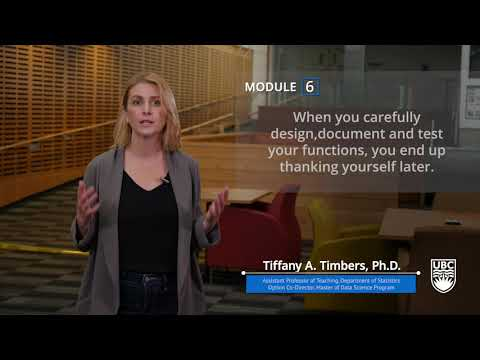

In [109]:
from IPython.display import YouTubeVideo
YouTubeVideo('3d5rOf1SEUY', width=854, height=480)